# 作業二：MLB 資料視覺化

## 作業要求：
* 使用提供的 .ipynb 模板
* 計算所有大聯盟球員的平均得分（Runs）將球員分為「高得分」與「低得分」兩組
* 將兩組球員的 *得分指標（如下）* 全部相加 畫出這兩組的 correlation matrix
* 解釋你對結果的看法

## 得分指標
* 得分（Runs Scored, R）
* 打點（Runs Batted In, RBI）
* 安打數（Hits, H）
* 全壘打數（Home Runs, HR）
* 打擊率（Batting Average, AVG）
* 上壘率（On-Base Percentage, OBP）
* 長打率（Slugging Percentage, SLG）
* 盜壘數（Stolen Bases, SB）
* 打數（At Bats, AB）
* 四壞球率（Walks, BB）
* 被三振數（Strikeouts, K）


## 引入套件
這份作業會使用：
* [pandas](https://pandas.pydata.org/)
* [seaborn](https://seaborn.pydata.org/)
* [matplotlib](https://matplotlib.org/)

In [1]:
## TODO 1: 引入需使用的套件
import pandas
import seaborn
import matplotlib.pyplot as plt

%matplotlib inline

## 讀取檔案
使用 pandas 讀入 csv 檔，成為 dataframe

In [2]:
## TODO 2: 讀取檔案

# 讀取你的檔案
mlb_df = pandas.read_csv(r"MLB_Data_Crawling_and_Analysis\player_hitting.csv")

# 檢查
mlb_df.head()

,AB,AVG,BB,G,H,HR,OBP,PLAYER,R,RBI,SB,SLG,SO,TEAM
0,8,0.625,0,2,5,1,0.625,Michael Harris,2,2,0,1.125,1,ATL
1,11,0.455,1,3,5,2,0.500,Jackson Chourio,3,3,1,1.000,1,MIL
2,26,0.423,3,7,11,4,0.500,Fernando Tatis,8,7,0,1.000,2,SD
3,7,0.429,0,2,3,1,0.429,Cedric Mullins,1,1,0,1.000,1,BAL
4,12,0.333,5,4,4,1,0.529,Bryce Harper,3,3,0,0.750,5,PHI


## 處理資料
在這步驟，我們要先計算所有球員的平均得分，從而將球員分成高得分組與低得分組

In [3]:
# TODO 3: 處理資料

# 計算所有球員 Runs 的平均值
R_mean = mlb_df["R"].mean()

# 將球員分成得分高於平和低於平均兩組
above_avg_df = mlb_df.loc[mlb_df["R"] > R_mean].reset_index()
below_avg_df = mlb_df.loc[mlb_df["R"] < R_mean].reset_index()

## 資料視覺化
我們要分別對上面兩 dataframe 算出 [correlation matrix](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html)，並使用 [heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html) 為其視覺化

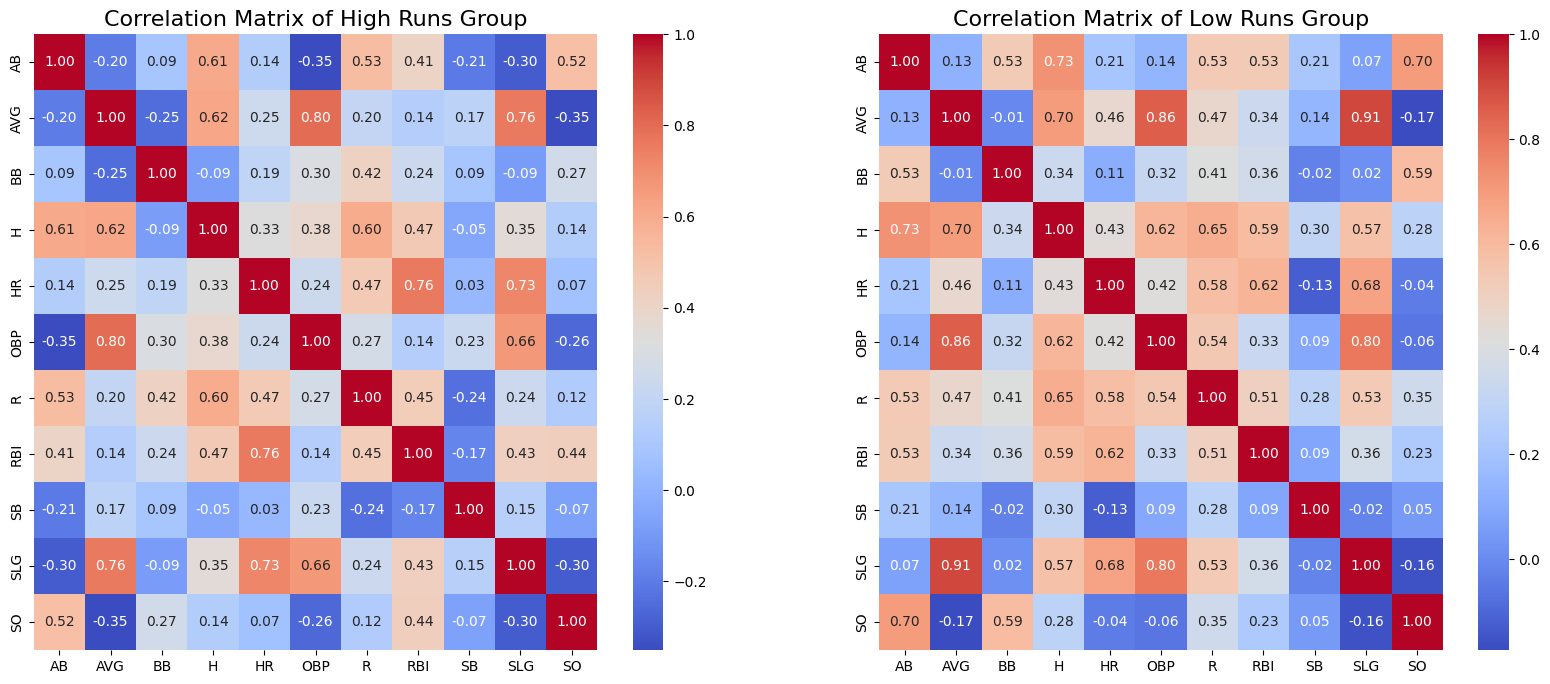

In [4]:
# TODO 4: 資料視覺化

# 要計算的欄位
numeric_cols = sorted(["R", "RBI", "H", "HR", "AVG", "OBP", "SLG", "SB", "AB", "BB", "SO"])

# 計算 correlation matrix
above_avg_cor_matrix = above_avg_df[numeric_cols].corr()
below_avg_cor_matrix = below_avg_df[numeric_cols].corr()

# 請將兩張圖娉排顯示。左邊是高得分組的 heatmap，右邊是低得分組
plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1) # 請設定子圖位置
# 繪製高得分組的 heatmap
seaborn.heatmap(above_avg_cor_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Matrix of High Runs Group', fontsize=16)

plt.subplot(1, 2, 2) # 請設定子圖位置
# 繪製低得分組的 heatmap
seaborn.heatmap(below_avg_cor_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Matrix of Low Runs Group', fontsize=16)

plt.show()

## 你的解讀
請回下列問題（直接將回答寫在這個 cell）

### Q1: 影響「高得分組」球員得分（Runs, R）較多的得分指標，和影響影響「低得分組」較多的指標一樣嗎？
撇除指標 R，在相關係數前兩高的指標中，「高得分組」的有 H 和 AB，而「低得分組」的有 H 和 HR。兩者數值最高的指標是一樣的，但次高的就不同了。

### Q2: 從這兩者的差距中，你觀察到了什麼、會如何解讀這樣的差距呢？（例如，你能說出影響球員是否會成為高得分球員的關鍵因素嗎？）
從兩者數值次高的指標來看，高分組靠「打數」，而低分組則靠「全壘打數」，也就是，高分組分數高可能和上場次數有關，而低分組的分數則可能有部分來自全壘打。至於從兩者數值最高的指標（「安打數」）則能知道，把球打出去並成功上壘是得分的關鍵。不過，這些數值和「得分數」的相關係數都不大，都小於 0.7，所以可能有其他因素影響「得分數」。